Credits (Udemy Course) - https://www.udemy.com/course/deeplearning/

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from ann_visualizer.visualize import ann_viz
import graphviz
from tensorflow.keras.utils import plot_model

In [2]:
 df = pd.read_csv(r"E:\Github\Datasets\Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df['Gender'].value_counts().index[0]

'Male'

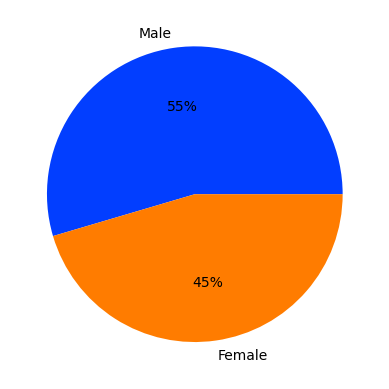

In [5]:
colors = sns.color_palette('bright')[0:3]

#create pie chart
plt.pie(x = df['Gender'].value_counts().values, 
        labels = df['Gender'].value_counts().index, 
        colors = colors, autopct='%.0f%%')
plt.show()

<AxesSubplot:xlabel='Geography', ylabel='count'>

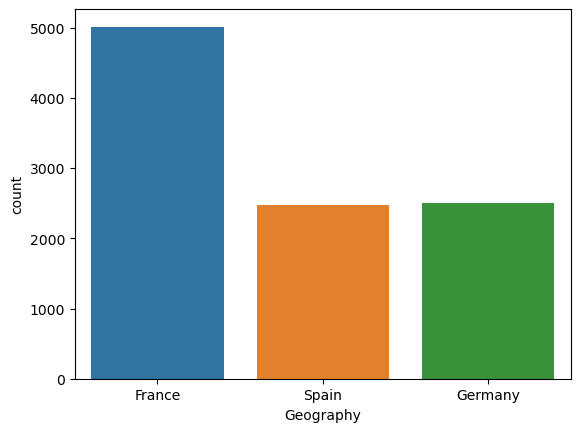

In [6]:
sns.countplot(data = df, x = 'Geography')

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

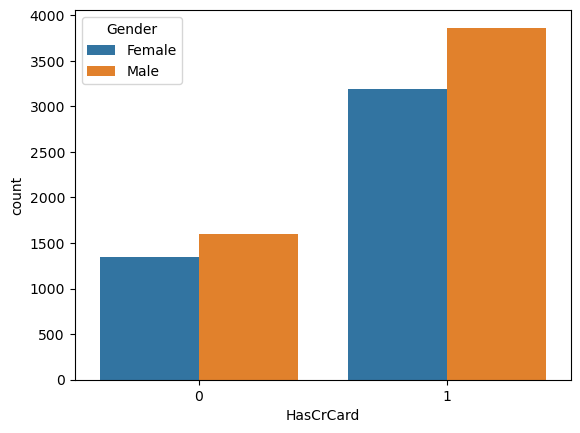

In [7]:
sns.countplot(data = df, x = 'HasCrCard', hue = 'Gender')

In [8]:
df.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [9]:
X = df.iloc[:, 3:-1]
y = df.iloc[:, -1]

In [10]:
X.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57


In [11]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

Encoding categorical variables

In [12]:
le = LabelEncoder()

In [13]:
X['Gender'] = le.fit_transform(X['Gender'])

In [14]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10


In [15]:
X = pd.get_dummies(data = X, 
               prefix='Geography',
               prefix_sep='_',
               dummy_na = False,
               columns=['Geography'])

In [16]:
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [17]:
X_cols = list(X.columns)
X_cols

['CreditScore',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain']

Splitting of the dataset

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
X_train.shape, y_train.shape

((8000, 12), (8000,))

In [20]:
X_test.shape, y_test.shape

((2000, 12), (2000,))

Feature Scaling

In [21]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit(X_test)

#### Building the ANN Model

In [22]:
ann = tf.keras.models.Sequential()

In [23]:
ann.add(tf.keras.layers.Dense(units= 6, activation = 'relu'))

In [24]:
ann.add(tf.keras.layers.Dense(units= 6, activation = 'relu'))

In [25]:
ann.add(tf.keras.layers.Dense(units= 1, activation = 'sigmoid'))

In [31]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [34]:
ann.fit(X_train, y_train, batch_size=32, epochs=200)

Epoch 1/200
250/250 [==============================] - 4s 6ms/step - loss: 0.5642 - accuracy: 0.7441
Epoch 2/200
250/250 [==============================] - 1s 5ms/step - loss: 0.4633 - accuracy: 0.7970
Epoch 3/200
250/250 [==============================] - 1s 5ms/step - loss: 0.4402 - accuracy: 0.8004
Epoch 4/200
250/250 [==============================] - 1s 5ms/step - loss: 0.4299 - accuracy: 0.8075
Epoch 5/200
250/250 [==============================] - 1s 5ms/step - loss: 0.4237 - accuracy: 0.8154
Epoch 6/200
250/250 [==============================] - 1s 6ms/step - loss: 0.4178 - accuracy: 0.8215
Epoch 7/200
250/250 [==============================] - 1s 5ms/step - loss: 0.4126 - accuracy: 0.8244
Epoch 8/200
250/250 [==============================] - 2s 7ms/step - loss: 0.4082 - accuracy: 0.8284
Epoch 9/200
250/250 [==============================] - 1s 4ms/step - loss: 0.4047 - accuracy: 0.8299
Epoch 10/200
250/250 [==============================] - 1s 4ms/step - loss: 0.4011 - accura

250/250 [==============================] - 1s 5ms/step - loss: 0.3336 - accuracy: 0.8627
Epoch 82/200
250/250 [==============================] - 1s 5ms/step - loss: 0.3335 - accuracy: 0.8614
Epoch 83/200
250/250 [==============================] - 1s 5ms/step - loss: 0.3332 - accuracy: 0.8650
Epoch 84/200
250/250 [==============================] - 1s 5ms/step - loss: 0.3336 - accuracy: 0.8648
Epoch 85/200
250/250 [==============================] - 1s 5ms/step - loss: 0.3332 - accuracy: 0.8637
Epoch 86/200
250/250 [==============================] - 1s 5ms/step - loss: 0.3333 - accuracy: 0.8636
Epoch 87/200
250/250 [==============================] - 1s 5ms/step - loss: 0.3324 - accuracy: 0.8639
Epoch 88/200
250/250 [==============================] - 1s 5ms/step - loss: 0.3331 - accuracy: 0.8629
Epoch 89/200
250/250 [==============================] - 1s 5ms/step - loss: 0.3332 - accuracy: 0.8635
Epoch 90/200
250/250 [==============================] - 2s 7ms/step - loss: 0.3327 - accuracy: 

250/250 [==============================] - 1s 4ms/step - loss: 0.3280 - accuracy: 0.8670
Epoch 161/200
250/250 [==============================] - 1s 4ms/step - loss: 0.3288 - accuracy: 0.8661
Epoch 162/200
250/250 [==============================] - 1s 4ms/step - loss: 0.3281 - accuracy: 0.8665
Epoch 163/200
250/250 [==============================] - 1s 4ms/step - loss: 0.3283 - accuracy: 0.8646
Epoch 164/200
250/250 [==============================] - 1s 4ms/step - loss: 0.3288 - accuracy: 0.8661
Epoch 165/200
250/250 [==============================] - 1s 4ms/step - loss: 0.3285 - accuracy: 0.8677
Epoch 166/200
250/250 [==============================] - 1s 4ms/step - loss: 0.3284 - accuracy: 0.8668
Epoch 167/200
250/250 [==============================] - 1s 4ms/step - loss: 0.3277 - accuracy: 0.8664
Epoch 168/200
250/250 [==============================] - 1s 4ms/step - loss: 0.3288 - accuracy: 0.8656
Epoch 169/200
250/250 [==============================] - 1s 4ms/step - loss: 0.3284 - a

In [37]:
ann_viz(model = ann,filename='my_ann_model.gv',title='Artificial Neuron')

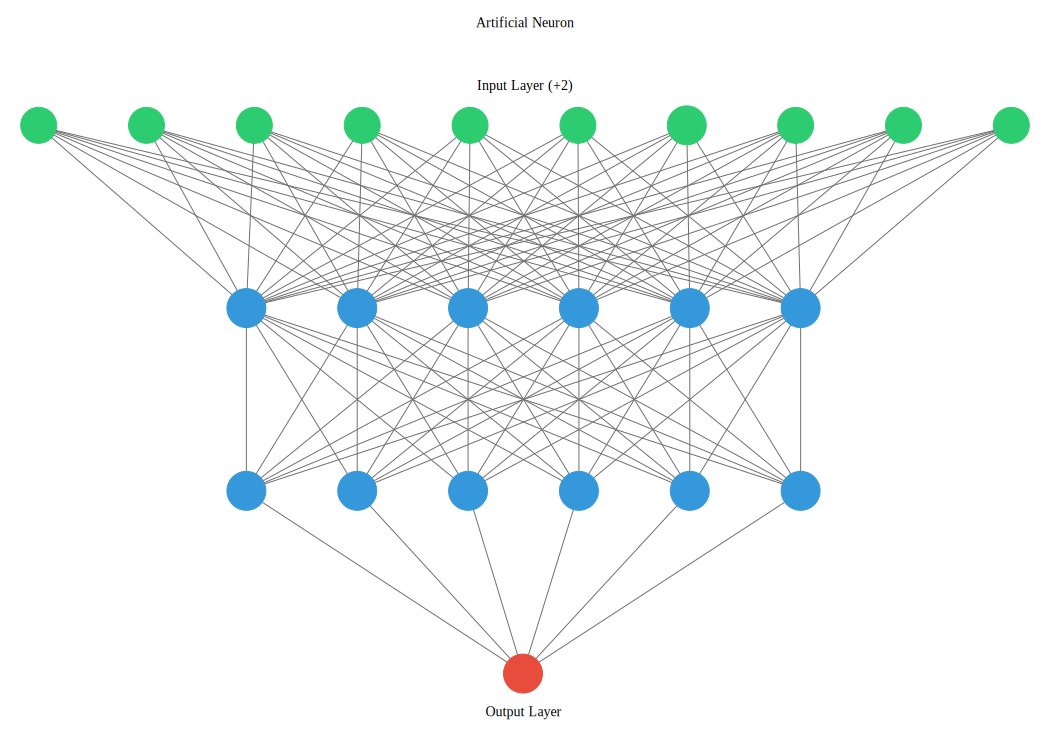

<Figure size 1000x900 with 0 Axes>

In [45]:
# The below code displays the Neural network, however, it is quite large to fit in the screen.
# plt.figure(figsize=(10,9))
# graph_file = graphviz.Source.from_file('my_ann_model.gv')
# graph_file

In [48]:
# Convert a .dot file to .png
from graphviz import render
filename = render('dot', 'png', 'my_ann_model.gv')
filename

'my_ann_model.gv.png'

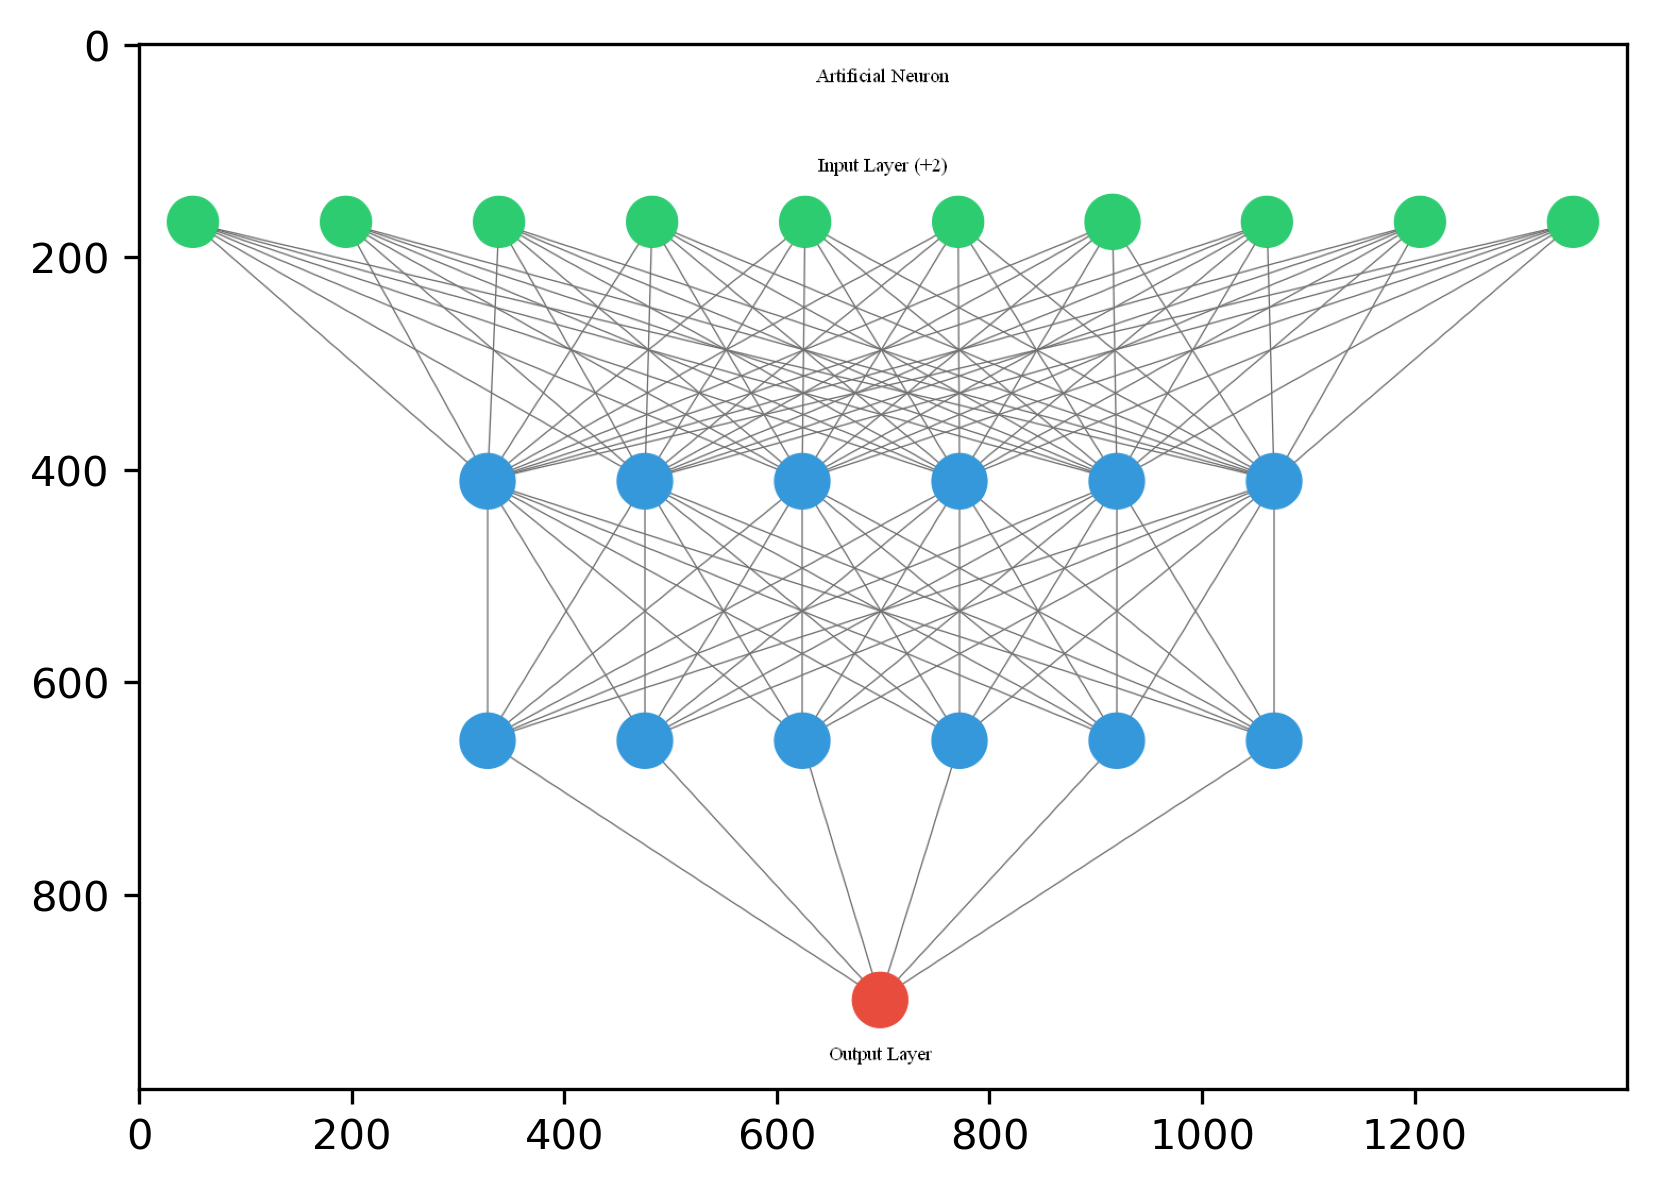

In [58]:
plt.figure(dpi=300)
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
plt.show()